In [1]:
A="Mumbai"
B="Hyderabad"
connections = []
import matplotlib.pyplot as plt

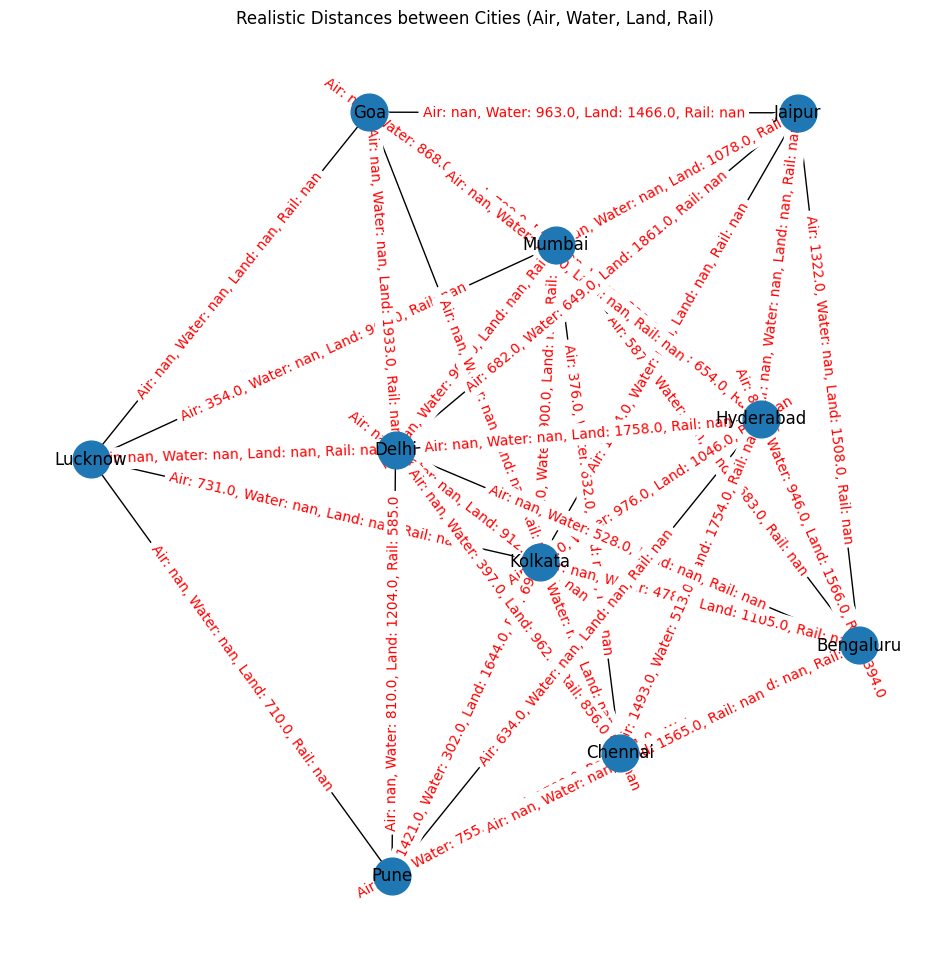

     Origin Destination  Air Distance  Air Factor  Water Distance  \
0    Mumbai     Kolkata        1016.0     55676.8           382.0   
1    Mumbai     Chennai        1259.0     68993.2           383.0   
2    Mumbai     Kolkata        1445.0     79186.0           900.0   
3    Mumbai     Lucknow         354.0     19399.2             NaN   
4    Mumbai     Chennai           NaN         NaN           376.0   
..      ...         ...           ...         ...             ...   
63   Jaipur       Delhi         682.0     37373.6           649.0   
64  Lucknow     Kolkata           NaN         NaN             NaN   
65  Lucknow     Kolkata         731.0     40058.8             NaN   
66  Lucknow         Goa           NaN         NaN             NaN   
67  Lucknow       Delhi           NaN         NaN             NaN   

    Water Factor  Land Distance  Truck Factor  Rail Distance  Rail Factor  
0         1642.6            NaN           NaN            NaN          NaN  
1         1646.9   

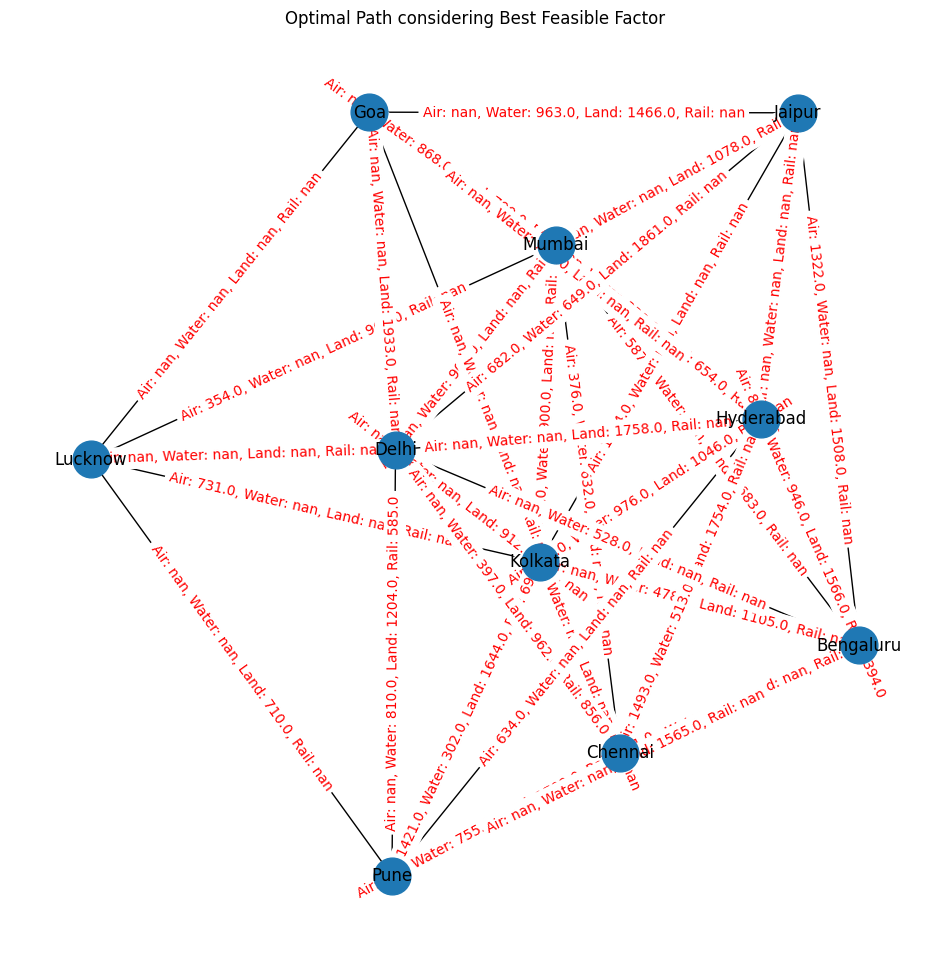

     Origin Destination  Air Distance  Air Factor  Water Distance  \
0    Mumbai     Kolkata        1016.0     55676.8           382.0   
1    Mumbai     Chennai        1259.0     68993.2           383.0   
2    Mumbai     Kolkata        1445.0     79186.0           900.0   
3    Mumbai     Lucknow         354.0     19399.2             NaN   
4    Mumbai     Chennai           NaN         NaN           376.0   
..      ...         ...           ...         ...             ...   
63   Jaipur       Delhi         682.0     37373.6           649.0   
64  Lucknow     Kolkata           NaN         NaN             NaN   
65  Lucknow     Kolkata         731.0     40058.8             NaN   
66  Lucknow         Goa           NaN         NaN             NaN   
67  Lucknow       Delhi           NaN         NaN             NaN   

    Water Factor  Land Distance  Truck Factor  Rail Distance  Rail Factor  \
0         1642.6            NaN           NaN            NaN          NaN   
1         1646.9 

NameError: name 'truck' is not defined

In [2]:
def main(A,B):
    import networkx as nx
    import pandas as pd
    import matplotlib.pyplot as plt
    import random
    global df
    cities_connections = {
    'Mumbai': 9,
    'Delhi': 9,
    'Hyderabad': 8,
    'Kolkata': 8,
    'Bengaluru': 7,
    'Pune': 6,
    'Chennai': 6,
    'Goa': 6,
    'Jaipur': 5,
    'Lucknow': 4
    }

# Generate data for air, water, land, and rail distances
    

    for city, num_connections in cities_connections.items():
        for _ in range(num_connections):
            connected_city = random.choice(list(cities_connections.keys()))
            while connected_city == city or (city, connected_city) in connections or (connected_city, city) in connections:
                connected_city = random.choice(list(cities_connections.keys()))

        # Randomly determine the types of connections
            has_air = random.choice([True, False])
            has_water = random.choice([True, False])
            has_land = random.choice([True, False])
            has_rail = has_land and random.choice([True, False])

        # Generate distances based on connection types
            if has_air:
                air_distance = random.randint(300, 1500)
                air_factor = (air_distance * 28 * 0.6) + (air_distance * 95 * 0.4)
            else:
                air_distance = None
                air_factor = None

            if has_water:
                water_distance = random.randint(200, 1000)
                water_factor = (water_distance * 0.6 * 0.5) + (water_distance * 0.4 * 10)
            else:
                water_distance = None
                water_factor = None

            if has_land:
                land_distance = random.randint(500, 2000)
                truck_factor = (land_distance * 0.6 * 11) + (land_distance * 0.4 * 50)
            else:
                land_distance = None
                truck_factor = None

            if has_rail:
                rail_distance = random.randint(300, 1500)
                rail_factor = (rail_distance * 0.6 * 3) + (rail_distance * 0.4 * 25)
            else:
                rail_distance = None
                rail_factor = None

            connections.append(
                (
                    city,
                    connected_city,
                    air_distance,
                    air_factor,
                    water_distance,
                    water_factor,
                    land_distance,
                    truck_factor,
                    rail_distance,
                    rail_factor
                )
            )

# Create DataFrame
    df = pd.DataFrame(connections, columns=[
        'Origin', 'Destination',
        'Air Distance', 'Air Factor',
        'Water Distance', 'Water Factor',
        'Land Distance', 'Truck Factor',
        'Rail Distance', 'Rail Factor'
    ])

    G = nx.from_pandas_edgelist(df, 'Origin', 'Destination', ['Air Distance', 'Air Factor', 'Water Distance', 'Water Factor', 'Land Distance', 'Truck Factor', 'Rail Distance', 'Rail Factor'])

# Draw the graph
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, seed=42)

# nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)

# edges with labels for 'Air Distance', 'Water Distance', 'Land Distance', 'Rail Distance'
    edge_labels = {
        (u, v): f"Air: {d['Air Distance']}, Water: {d['Water Distance']}, Land: {d['Land Distance']}, Rail: {d['Rail Distance']}" 
        for u, v, d in G.edges(data=True)
    }
    nx.draw_networkx_edges(G, pos, width=1)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

    nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

    plt.title('Realistic Distances between Cities (Air, Water, Land, Rail)')
    plt.axis('off')
    plt.show()

    print(df)

    import networkx as nx
    import pandas as pd
    import numpy as np
    
    G = nx.from_pandas_edgelist(df, 'Origin', 'Destination', ['Air Factor', 'Water Factor', 'Truck Factor', 'Rail Factor'])

# Choose the best feasible factor for each edge
    df['Best_Feasible_Factor'] = df[['Air Factor', 'Water Factor', 'Truck Factor', 'Rail Factor']].min(axis=1)

# Create a new graph with the best feasible factor as the weight
    G_best_factor = nx.from_pandas_edgelist(df, 'Origin', 'Destination', ['Best_Feasible_Factor'])

# Find the optimal path based on the best feasible factor
    optimal_path = nx.shortest_path(G_best_factor, source='Mumbai', target='Lucknow', weight='Best_Feasible_Factor')

# Visualize the graph with the best feasible factor
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, seed=42)
    nx.draw_networkx_nodes(G, pos, node_size=700)
    nx.draw_networkx_edges(G, pos, width=1)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
    plt.title('Optimal Path considering Best Feasible Factor')
    plt.axis('off')
    plt.show()

# Display the updated DataFrame
    print(df)
    print("Optimal Path:", optimal_path)


#TRUCK
   

    
#PLANE
    


main(A,B)
truck(A,B)
plane(A,B)
water(A,B)
rail(A,B)
best_case(A,B)

In [ ]:
def truck(A,B):
    import networkx as nx
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
#     df = pd.DataFrame(connections, columns=
#         ['Origin', 'Destination'
#         'Air Distance', 'Air Factor',
#         'Water Distance', 'Water Factor',
#         'Land Distance', 'Truck Factor',
#         'Rail Distance', 'Rail Factor'
#     ])
# Assuming 'df' is your DataFrame
    df['Truck Factor'].fillna(np.inf, inplace=True)
    G = nx.from_pandas_edgelist(df, 'Origin', 'Destination', ['Truck Factor'])
    
# Draw the graph
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, seed=42)

    source_city = A
    target_city = B

# Print the shortest path
    shortest_path = nx.shortest_path(G, source=source_city, target=target_city, weight='Truck Factor')
    print(f"Shortest path from {source_city} to {target_city} based on 'Truck Factor': {shortest_path}")
    total_cost = sum(G[u][v]['Truck Factor'] for u, v in zip(shortest_path[:-1], shortest_path[1:]))
    print(f"Total cost: {total_cost}")

In [ ]:
def plane(A,B):
    import networkx as nx
    import pandas as pd
    import numpy as np
#     df = pd.DataFrame(connections, columns=[
#         'Origin', 'Destination',
#         'Air Distance', 'Air Factor',
#         'Water Distance', 'Water Factor',
#         'Land Distance', 'Truck Factor',
#         'Rail Distance', 'Rail Factor'
#     ])
    # Assuming 'df' is your DataFrame
    df['Air Factor'].fillna(np.inf, inplace=True)

    G = nx.from_pandas_edgelist(df, 'Origin', 'Destination', ['Air Factor'])
    source_city = A
    target_city = B

# Print the shortest path
    shortest_path = nx.shortest_path(G, source=source_city, target=target_city, weight='Air Factor')
    print(f"Shortest path from {source_city} to {target_city} based on 'Air Factor': {shortest_path}")
    total_cost = sum(G[u][v]['Air Factor'] for u, v in zip(shortest_path[:-1], shortest_path[1:]))
    print(f"Total cost: {total_cost}")

In [ ]:
def water(A,B):
    import networkx as nx
    import pandas as pd
    import numpy as np
#     df = pd.DataFrame(connections, columns=[
#         'Origin', 'Destination',
#         'Air Distance', 'Air Factor',
#         'Water Distance', 'Water Factor',
#         'Land Distance', 'Truck Factor',
#         'Rail Distance', 'Rail Factor'
#     ])
    # Assuming 'df' is your DataFrame
    df['Water Factor'].fillna(np.inf, inplace=True)

    G = nx.from_pandas_edgelist(df, 'Origin', 'Destination', ['Water Factor'])

    source_city = A
    target_city = B

    # Print the shortest path
    shortest_path = nx.shortest_path(G, source=source_city, target=target_city, weight='Water Factor')
    print(f"Shortest path from {source_city} to {target_city} based on 'Water Factor': {shortest_path}")
    total_cost = sum(G[u][v]['Water Factor'] for u, v in zip(shortest_path[:-1], shortest_path[1:]))
    print(f"Total cost: {total_cost}")

In [ ]:
def rail(A,B):
    import networkx as nx
    import pandas as pd
    import numpy as np
#     df = pd.DataFrame(connections, columns=[
#         'Origin', 'Destination',
#         'Air Distance', 'Air Factor',
#         'Water Distance', 'Water Factor',
#         'Land Distance', 'Truck Factor',
#         'Rail Distance', 'Rail Factor'
#     ])
    # Assuming 'df' is your DataFrame
    df['Rail Factor'].fillna(np.inf, inplace=True)

    G = nx.from_pandas_edgelist(df, 'Origin', 'Destination', ['Rail Factor'])

    source_city = A
    target_city = B
    
    # Print the shortest path

    shortest_path = nx.shortest_path(G, source=source_city, target=target_city, weight='Rail Factor')
    print(f"Shortest path from {source_city} to {target_city} based on 'Rail Factor': {shortest_path}")
    total_cost = sum(G[u][v]['Rail Factor'] for u, v in zip(shortest_path[:-1], shortest_path[1:]))
    print(f"Total cost: {total_cost}")
    

In [3]:
def best_case(A,B):
    import networkx as nx
    import pandas as pd
    import numpy as np
#     df = pd.DataFrame(connections, columns=[
#         'Origin', 'Destination',
#         'Air Distance', 'Air Factor',
#         'Water Distance', 'Water Factor',
#         'Land Distance', 'Truck Factor',
#         'Rail Distance', 'Rail Factor', 'Best_Feasible_Factor' 
#     ])

# Assuming 'df' is your DataFrame
    df['Best_Feasible_Factor'].fillna(np.inf, inplace=True)

    G = nx.from_pandas_edgelist(df, 'Origin', 'Destination', ['Best_Feasible_Factor', 'Air Distance', 'Water Distance', 'Land Distance', 'Rail Distance'])

    source_city = A
    target_city = B

# Validate input cities
    if source_city not in G.nodes or target_city not in G.nodes:
        print("Invalid source or target city. Please enter valid city names.")
    else:
        try:
        # Find the shortest path
            shortest_path = nx.shortest_path(G, source=source_city, target=target_city, weight='Best_Feasible_Factor')

        # Initialize variables to store total cost and transport modes
            total_cost = 0
            transport_modes = []

        # Print details for each segment of the path
            for i, (u, v) in enumerate(zip(shortest_path[:-1], shortest_path[1:])):
                best_feasible_factor = G[u][v]['Best_Feasible_Factor']

            # Determine the mode of transport based on the available distances
                air_distance = G[u][v]['Air Distance']
                water_distance = G[u][v]['Water Distance']
                land_distance = G[u][v]['Land Distance']
                rail_distance = G[u][v]['Rail Distance']

                mode_of_transport = None
                if air_distance is not None and best_feasible_factor == air_distance * 28 * 0.6 + air_distance * 95 * 0.4:
                    mode_of_transport = 'Air'
                elif water_distance is not None and best_feasible_factor == water_distance * 0.6 * 0.5 + water_distance * 0.4 * 10:
                    mode_of_transport = 'Water'
                elif land_distance is not None and best_feasible_factor == land_distance * 0.6 * 11 + land_distance * 0.4 * 50:
                    mode_of_transport = 'Land'
                elif rail_distance is not None and best_feasible_factor == rail_distance * 0.6 * 3 + rail_distance * 0.4 * 25:
                    mode_of_transport = 'Rail'

                transport_modes.append(mode_of_transport)

            # Print details for each segment
                print(f"Segment {i + 1}: From {u} to {v} - Best_Feasible_Factor: {best_feasible_factor}, Mode of Transport: {mode_of_transport}")

            # Calculate total cost
                total_cost += best_feasible_factor

        # Print total cost and mode of transport for the entire path
            print(f"\nTotal Cost: {total_cost}")
            print(f"Mode of Transport for the Entire Path: {', '.join(filter(None, transport_modes))}")

        except nx.NetworkXNoPath:
            print(f"No path exists between {source_city} and {target_city}.")

In [4]:
import pickle
